# The Sparks Foundation - GRIP October 

# Data Science & Business Analytics Internship


### Name - Mohini Singh

## Task - 1 : Prediction Using Supervised ML

In [17]:
#To Predict the percentage of an student on the no. of study hours

### Exploring the Data

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading data from csv file
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info() #shape of object types of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe().T #Summary statistic of data

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [5]:
#sorting values of dataset in ascending order
data.sort_values(by=['Hours'], inplace=True)

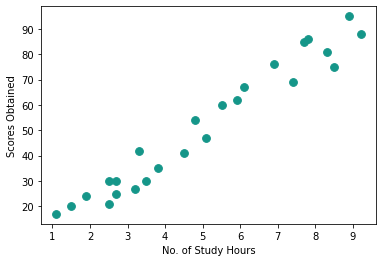

In [6]:
#Plotting the graph between no. of study hours and scores obtained
data.plot(x = "Hours", y = "Scores", color = '#159689', kind = 'scatter', s = 60)
plt.xlabel("No. of Study Hours")
plt.ylabel("Scores Obtained")
plt.show()

#### From the above graphs we can see that there is a positive linear relation between the No. of study hours and scores obtained by the student

### Linear Regression

In [7]:
Y = data["Scores"].values #dependent variable
X1 = data["Hours"].values.reshape(-1,1) #independent variable

In [8]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.2, random_state = 0)

In [9]:
#Creating the Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X1_train, Y_train)

In [10]:
i = model.intercept_ #Calculating intercept of our model
i

2.5300405912062587

In [11]:
c = model.coef_ #Calculating intercept of our model
c

array([9.66210145])

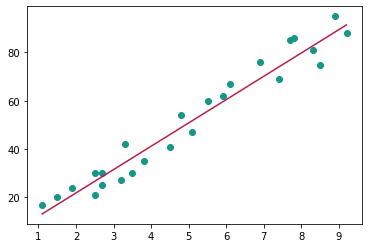

In [12]:
#Ploting the graph for linear regression line and data
fit_line = c*X1+i
plt.scatter(X1,Y, color = "#159689")
plt.plot(X1,fit_line, color = "#B91E46")

plt.show()

In [13]:
#Predicting for test dataset
Y_predict = reg.predict(X1_test)

In [14]:
#Calculating actual and predicted values for our linear regression model
dataFrame = pd.DataFrame({"Actual": Y_test, "Predicted": Y_predict})
dataFrame

,Actual,Predicted
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


In [15]:
#Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Calculating mean absolute error
mae = (mean_absolute_error(Y_test, Y_predict))
print("MAE : ", mae)

#Calculating root mean squared error
rmse = (np.sqrt(mean_squared_error(Y_test, Y_predict)))
print("RMSE : ", rmse)

#Calculating coefficient of determination
r2_score = (r2_score(Y_test, Y_predict))
print("R2 Score : ", r2_score)

MAE :  4.621333622532769
RMSE :  5.14659560183947
R2 Score :  0.9503831741928792


In [16]:
#Predicting score on the basis of given no of study hours
hours = np.array([9.25])
hours = hours.reshape(-1,1)
prediction = model.predict(hours)
print("No of Hours for which the score is to be predicted:{}".format(float(hours)))
print("Predicted Score : {}".format(round(prediction[0],2)))

No of Hours for which the score is to be predicted:9.25
Predicted Score : 91.9
